In [2]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [3]:
data = {
'Cielo': ['Soleado', 'Soleado','Nublado', 'Lluvioso', 'Lluvioso','Lluvioso', 'Nublado','Soleado', 'Soleado','Lluvioso', 'Soleado','Nublado', 'Nublado','Lluvioso'],
'Humedad': ['Alta', 'Alta', 'Alta','Normal', 'Normal', 'Alta', 'Normal','Alta', 'Hormal', 'Normal','Normal', 'Alta', 'Normal', 'Alta', ],
'Viento': ['Débil', 'Fuerte', 'Débil',"Débil", 'Fuerte', 'Débil', 'Fuerte',"Débil", "Débil", 'Débil','Fuerte', 'Fuerte', 'Débil','Fuerte'],
'Jugar': ['No', 'No', 'Si', 'Si', 'No', 'Si', 'Si','No', 'Si','Si', 'Si', 'Si', 'Si', 'No']

}
df = pd.DataFrame(data)


In [4]:
label_encoders = {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le


df_encoded

,Cielo,Humedad,Viento,Jugar
0,2,0,0,0
1,2,0,1,0
2,1,0,0,1
3,0,2,0,1
4,0,2,1,0
5,0,0,0,1
6,1,2,1,1
7,2,0,0,0
8,2,1,0,1
9,0,2,0,1


In [5]:
X = df_encoded.drop('Jugar',axis=1)
y = df_encoded['Jugar']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [6]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print(f"Precision del Modelo: {accuracy:.2f}")


Precision del Modelo: 0.80


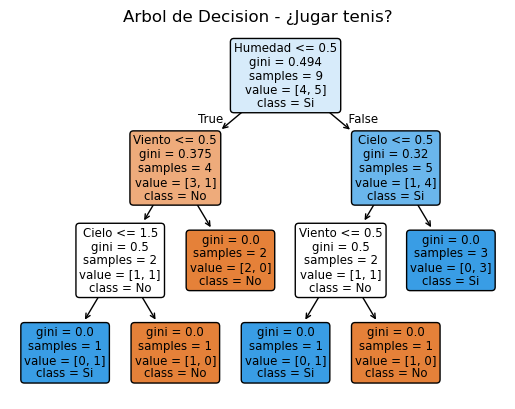

In [7]:
plt
plot_tree(
    model,
    feature_names= X.columns,
    class_names =["No","Si"],
    filled = True,
    rounded=True,
    impurity = True
          )

plt.title("Arbol de Decision - ¿Jugar tenis?")
plt.show()

In [8]:
print("Importancia de Caracterisiticcas", model.feature_importances_)
print("Nombres de Caracteristicas",X.columns)


nuevo_dia = pd.DataFrame([[1,1,0]],columns = X.columns)

prediccion = model.predict(nuevo_dia)

Importancia de Caracterisiticcas [0.36   0.3025 0.3375]
Nombres de Caracteristicas Index(['Cielo', 'Humedad', 'Viento'], dtype='object')


In [9]:
if prediccion[0] == 1:
    print("Prediccion si se puede jugar")
else:
    print("Prediccion: No, no se puede jugar.")

Prediccion si se puede jugar
